In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
def save_data(data: object, filename: str) -> None:
    with open(filename, 'wb') as file:
        pickle.dump(data, file)

def load_data(filename: str) -> object:
    with open(filename, 'rb') as file:
        loaded_data = pickle.load(file)
    return loaded_data

def reformat_to_fp32(data):
    data = data.dropna(axis=0)
    y = data['Label']
    X = data.drop('Label', axis=1)
    X, y = shuffle(X, y)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=26442)
    X_train = X_train.astype(np.float32)
    X_val = X_val.astype(np.float32)
    return X_train, X_val, y_train, y_val

In [4]:
data = load_data('./Dataset/scaled_dataset.pkl')
X_train, X_val, y_train, y_val = reformat_to_fp32(data)
n_features = len(X_train.columns)

In [5]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Evaluate on test set
score = rf.score(X_val, y_val)
print("Accuracy: %.2f%%" % (score*100))

Accuracy: 5.65%


In [6]:
y_pred_train = rf.predict(X_train)
# Calculate training confusion matrix
conf_mat_train = confusion_matrix(y_train, y_pred_train)
# Predict on validation set
y_pred_val = rf.predict(X_val) 
# Calculate validation confusion matrix
conf_mat_val = confusion_matrix(y_val, y_pred_val)

print("Training Confusion Matrix:")
print(conf_mat_train)
print("\nValidation Confusion Matrix:") 
print(conf_mat_val)


[45. 42. 21. ... 24. 24. 52.]
Training Confusion Matrix:
[[85  0  0 ...  0  0  0]
 [ 0  2  0 ...  0  0  0]
 [ 0  0 90 ...  0  0  0]
 ...
 [ 0  0  0 ...  2  0  0]
 [ 0  0  0 ...  0  4  0]
 [ 0  0  0 ...  0  0  1]]

Validation Confusion Matrix:
[[8 0 2 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [8 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


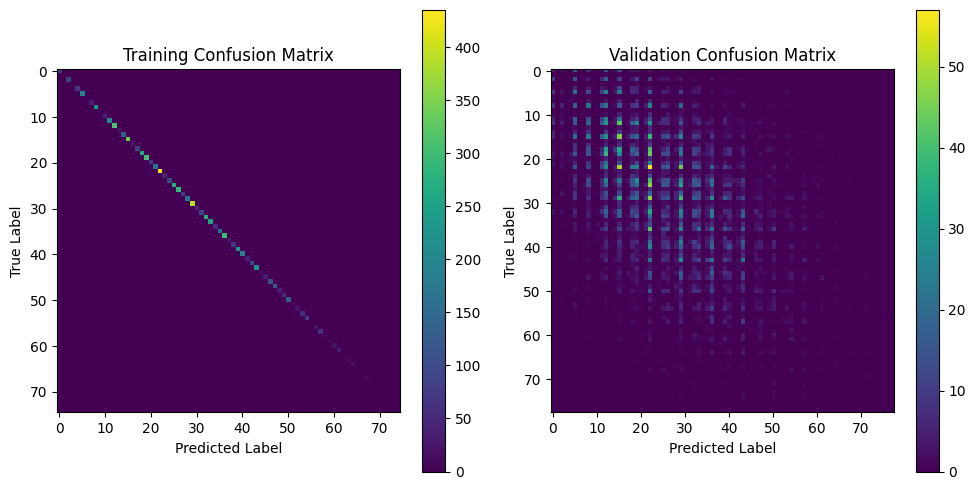

In [15]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.title('Training Confusion Matrix')
plt.imshow(conf_mat_train)
plt.colorbar()
plt.xlabel('Predicted Label')  
plt.ylabel('True Label')

plt.subplot(122)
plt.title('Validation Confusion Matrix')
plt.imshow(conf_mat_val)
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label') 

plt.tight_layout()
plt.show()